# Problem 1: Robot Localization (32 points)

A robot is wandering around a room with some obstacles, labeled as $\#$ in the grid below. It can occupy any of the free cells labeled with a letter, but we are uncertain about its true location and thus keep a belief distribution over its current location. At each timestep it moves from its current cell to a neighboring free cell in one of the four cardinal directions with uniform probability; it cannot stay in the same cell. For example, from A the robot can move to either B or C with probability $\frac12$, while from D it can move to B, C, E, or F, each with probability $\frac14$.

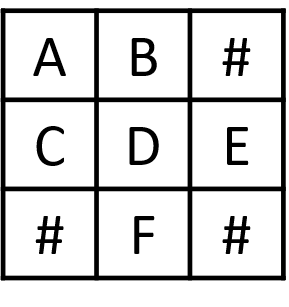

The robot also makes an observation after each transition, returning what it sees in a randomly chosen cardinal direction. Possibilities include observing $\#$, "wall", or "empty" (for a free cell). For example, in C the robot observes "wall", $\#$ (each with probability $\frac14$), or "empty" (with probability $\frac12$).

**Note**: You don't have to show work for solving linear equations or eigenvectors, but please show what equations or matrices you use. Feel free to show your work in Python as well. You may also omit computations that will turn out to be zero based on the provided information.

1.  Suppose that the robot wanders around forever without making observations. What is the stationary distribution over the robot's predicted location? 

2. The initial distribution $X_0$ is uniform over all possible states. The robot makes a transition and observes $e_1 = $ "wall". It then makes a second transition and again observes $e_2 = $ "wall". What are the belief distributions $\Pr(X_1 \mid e_1)$ and $\Pr(X_2 \mid e_1, e_2)$?

4. Compute the joint distribution $\Pr(X_1, X_2 \mid e_1, e_2)$. Hint: First determine the state sequences with nonzero probabilities.

5. Are the states $X_1$ and $X_2$ independent given $e_1$ and $e_2$? Why or why not? What is the most likely state sequence(s) of $X_1$ and $X_2$?

ENTER YOUR RESPONSES HERE

1.  
T = 
\begin{bmatrix}
0 & 0.5 & 0.5 & 0 & 0 & 0\\
0.5 & 0 & 0 & 0.25 & 0 & 0\\
0.5 & 0 & 0 & 0.25 & 0 & 0\\
0 & 0.5 & 0.5 & 0 & 1 & 1\\
0 & 0 & 0 & 0.25 & 0 & 0\\
0 & 0 & 0 & 0.25 & 0 & 0\\
\end{bmatrix}

$P_{\infty}(A) = 0.5P_{\infty}(B) + 0.5P_{\infty}(C)$ \\
$P_{\infty}(B) = 0.5P_{\infty}(A) + 0.5P_{\infty}(D)$ \\
$P_{\infty}(C) = 0.5P_{\infty} + 0.25P_{\infty}(D)$ \\
$P_\infty(D) = 0.5P_\infty(B) + 0.5P_\infty(C) + P_\infty(E) + P_\infty(F)$ \\
$P_\infty(E) = 0.25P_\infty(D)$ \\
$P_\infty(F) = 0.25P_\infty(D)$ \\

$P_{\infty}(A) = 1/6$ \\
$P_{\infty}(B) = 1/6$ \\
$P_{\infty}(C) = 1/6$ \\
$P_{\infty}(D) = 1/3$ \\
$P_{\infty}(E) = 1/12$ \\
$P_{\infty}(F) = 1/12$ \\
\\

2. 
$P(X_0) = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]$ \\
$𝑃(𝑋_1) = 𝑇 * 𝑃(𝑋_0) = [0.167, 0.125, 0.125, 0.4125, 0.04125, 0.04125]$ \\
$𝑃(𝑋_1 | e_1) = [0.083, 0.031, 0.031, 0, 0.01, 0.01]$ \\
Normalized: $[0.50, 0.188, 0.188, 0, 0.062, 0.062]$ \\
$𝑃(𝑋_2 | e_1, e_2) = [0.5, 0.25, 0.25, 0, 0.25, 0.25] * [0.188, 0.25, 0.25, 0.312, 0, 0] = [0.429, 0.285, 0.285, 0, 0, 0]$ \\


3. We can use the chain rule laws to rewrite $P(X_{1},X_{2}|e_{1},e_{2})$ as
$P(e_{1}|X_{2})P(X_{1}|e_{1})P(e_{1})P(X_{2}|X_{1})$. \\
$P(e_{1}|X_{2} ) = (.5, .25, .25, 0, .25, .25)$ \\
$e_{1} = (0.083, 0.031, 0.031, 0, 0.010, 0.010)$


4. The states $X_1$ and $X_2$ are not independent given $e_1$ and $e_2$ since step 2 depends on step 1. Consider the following example: if you are at state D, you can't get to state A because you are only able to move left, right, up, or down (not diagonally). Additionally, the states do not fulfill the following equations which are only true when $X_1$ and $X_2$ are independent: $P(X_1, X_2 | e_1, e_2) = P(X_1| e_1, e_2) = P(X_2 | e_1, e_2)$ The most likely sequences of $X_1$ and $X_2$ are  A, B, A, C.

In [ ]:
# ENTER ANY CODE FOR THE ABOVE PROBLEM HERE
import numpy as np
import numpy.linalg as nla


# Problem 2: Language Modeling (18 points)

One task in probabilistic [language modeling](https://en.wikipedia.org/wiki/Language_model) is to compute the probability of a  word given a sequence of words. Each word in a sequence can be thought of as a random variable $X_i$. In a phrase or sentence of $m$ words, we thus have a sequence of random variables $X_1, ..., X_m$. The domain size of each of the random variables would be the size of our vocabulary $|X|$.

1.  Suppose we want to predict a particular word $X_j$ given all other words in the sequence $X_1, ..., X_{j-1}, X_{j+1}, ..., X_m$. We use the **naive Bayes** approach. Write an analytical expression for the joint probability $\Pr(X_1, ..., X_m)$ in terms of the relevant CPTs from the model. What is the size of the largest CPT in your expression?

2.  Suppose that we want to predict the word $X_{m+1}$ given a sequence of $m$ words. We will use a model in which each word $X_i$ is conditioned on **all previous words** $X_1, ..., X_{i-1}$. Write an analytical expression for the joint probability $\Pr(X_1, ..., X_m)$ in terms of the relevant CPTs from the model. What is the size of the largest CPT in your expression?

3.  We again want to predict the word $X_{m+1}$ given a sequence of $m$ words. We will now use the **$n$-gram** model: $X_i$ is only conditioned on the  previous $n-1$ words. (A 1-gram model has no conditioning at all; each word is independent.) Write an analytical expression for the joint probability $\Pr(X_1, ..., X_m)$ in terms of the relevant CPTs from the model. For ease of notation you may assume that $n \geq 2$. What is the size of the largest CPT in your expression?
  

ENTER YOUR RESPONSES HERE

1.  $P(X_1, ... , X_m) = P(X_j) \prod_{i=1}^{m} P(X_j | X_1, ..., X_{j-1}, X_{j+1}, ..., X_m)$. \\
The size of the largest CPT is $|X|^2 = X^2$. \\

2. $P(X_1, ..., X_m) = P(X_{m+1}) \prod_{i=1}^{m} P(X_{m+1} | X_{1}, ..., X_m)$. \\
 The size of the largest CPT is $|X|^m$. \\


3.  $P(X_1, ..., X_m) = P(X_{m+1}) \prod_{i=1}^{m} P(X_{i} | X_{i-1}, ..., X_{i-1-n-1})$. \\
 The size of the largest CPT is $|X|^n$. 

# POS Tagging

In this assignment you will explore [part-of-speech (POS) tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging), a standard task in natural language processing. The goal is to identify parts of speech and related labels for each word in a given corpus. HMMs are well suited for this problem, with parts of speech being hidden states and the words themselves being observations.

We will be using data from the English EWT treebank from [Universal Dependencies](https://universaldependencies.org/treebanks/en_ewt/index.html), which uses 17 POS tags. We are providing clean versions of training and test data for you. The data format is such that each line contains a word and associated tag, and an empty line signifies the end of a sentence. Feel free to open the files in a text editor to get an idea.

Start by uploading both files to the Jupyter session storage (you should do this each time that you start a new session). You can do so by clicking the Files tab on the left sidebar and then uploading from your computer. Then run the following code cells.

In [1]:
import numpy as np

def read_sentence(f):
  sentence = []
  while True:
    line = f.readline()
    if not line or line == '\n':
      return sentence
    line = line.strip()
    word, tag = line.split("\t", 1)
    sentence.append((word, tag))

def read_corpus(file):
  f = open(file, 'r', encoding='utf-8')
  sentences = []
  while True:
    sentence = read_sentence(f)
    if sentence == []:
      return sentences
    sentences.append(sentence)

In [2]:
training = read_corpus('train.upos.tsv')
TAGS = ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 
        'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X']
NUM_TAGS = len(TAGS)

alpha = 0.1
tag_counts = np.zeros(NUM_TAGS)
transition_counts = np.zeros((NUM_TAGS,NUM_TAGS))
obs_counts = {}

for sent in training:
  for i in range(len(sent)):
    word = sent[i][0]
    pos = TAGS.index(sent[i][1])
    tag_counts[pos] += 1
    if i < len(sent)-1:
      transition_counts[TAGS.index(sent[i+1][1]), pos] += 1
    if word not in obs_counts:
      obs_counts[word] = np.zeros(NUM_TAGS)
    (obs_counts[word])[pos] += 1

X0 = tag_counts / np.sum(tag_counts)
TPROBS = transition_counts / np.sum(transition_counts, axis=0)
OPROBS = {'#UNSEEN': np.divide(alpha*np.ones(NUM_TAGS), tag_counts+alpha)}
for word, counts in obs_counts.items():
  OPROBS[word] = np.divide(counts, tag_counts+alpha)

The preceding cell estimates the parameters of the HMM model by going through all the training data and counting each tag, word, and transition that appears. `X0` is a numpy array storing the initial distribution of tags. `TPROBS` is the transition matrix, in the form of a 2d numpy array. `OPROBS` is a dictionary of 1d numpy arrays, with keys as the words appearing in the training data and their values being 1d numpy arrays of the emission probabilities. 

Notice that we're including one extra "tag" in `OPROBS`: an `#UNSEEN` tag. This is necessary because we will inevitably encounter words in the test dataset that we have not seen before. For any word that we have not seen, we treat it as if the word is just `#UNSEEN`. We assign the "count" of an `#UNSEEN` word to a constant value $\alpha$, so that it acts as Laplacian smoothing.

## Coding 1 (5 points)

Before we build our HMM, let's try a simplistic unigram model: given a single word, return the most likely POS tag. Context of surrounding words is therefore not considered. The probability of a tag given the word can be computed using Bayes' theorem:

$\Pr(\text{tag} \mid \text{word}) \propto \Pr(\text{word} \mid \text{tag}) \Pr(\text{tag})$

The most likely tag can then be found by taking the argmax of the above likelihood over all tags. Remember that we treat all words that did not appear before as ```#UNSEEN```. Complete the function below to achieve this (make sure to actually return the POS tag itself, not the tag index).

In [5]:
def unigram(obs):
  # Returns the tag of the word obs, as predicted by a unigram model
  # YOUR CODE HERE
  max = -float("inf")
  if OPROBS.get(obs) is None:
    prob = np.multiply(X0, OPROBS.get("#UNSEEN"))
  else:
    prob = np.multiply(X0, OPROBS.get(obs))
  for i in range(0,len(prob)):
    if prob[i] > max:
      max = prob[i]
      index = i
  return TAGS[index]


Test out your unigram model by running the cell below, which will tag the specified data and compute accuracy rates over all words and unseen words only. 

In [6]:
def evaluate(sentences, method):
  correct = 0
  correct_unseen = 0
  num_words = 0
  num_unseen_words = 0

  for sentence in sentences:
    words = [sent[0] for sent in sentence]
    pos = [sent[1] for sent in sentence]
    unseen = [word not in OPROBS for word in words]
    if method == 'unigram':
      predict = [unigram(w) for w in words]
    elif method == 'viterbi':
      predict = viterbi(words)
    else:
      print("invalid method!")
      return

    if len(predict) != len(pos):
      print("incorrect number of predictions")
      return
    correct += sum(1 for i,j in zip(pos, predict) if i==j)
    correct_unseen += sum(1 for i,j,k in zip(pos, predict, unseen) if i==j and k)
    num_words += len(words)
    num_unseen_words += sum(unseen)
  
  print("Accuracy rate on all words: ", correct/num_words)
  if num_unseen_words > 0:
    print("Accuracy rate on unseen words: ", correct_unseen/num_unseen_words)

print("Training data evaluation")
evaluate(training, 'unigram')
test = read_corpus('test.upos.tsv')
print("")
print("Test data evaluation")
evaluate(test, 'unigram')

Training data evaluation
Accuracy rate on all words:  0.9229889495471807

Test data evaluation
Accuracy rate on all words:  0.8569151691437223
Accuracy rate on unseen words:  0.3102094240837696


## Response 1 (5 points)

You should see that accuracy on the training data is about 92\%. Accuracy on the test data set is lower at about 85.7\%, with accuracy on unseen words only about 31\%. What does this last number mean? Your answer should be something like "31\% of [GROUP] have a POS tag of [TAG]". Briefly explain your reasoning.

ENTER YOUR RESPONSE HERE
31% of words in the test set have a POS tag of NOUN. The test set is made of unseen words, thus the resulting tag is a consequence of the algorithm trying to approximate some tag even though the word hasn't been seen. Essneitally, when a word is unseen, the algorithm takes the argma of the initial probabilites of each tag; again, this is because there are no prior observations which we can pick a tag for this word fromm. The argmax of the TAGS distribution, X0, is 7, so the algorithm always tries the tag "NOUN", giving 31% accuracy.

## Coding 2 (10 points)

We will now implement Viterbi to improve our performance over the unigram model. We will split the implementation into several subroutines. First complete the ```elapse_time``` function below. Given a distribution ```m```, it should return an updated "distribution" that occurs when applying the Viterbi update in one timestep. In addition, it should also return a list with the *indices* of the most likely prior tag for each current tag.

As a hint, these will correspond to ```max``` and ```argmax``` operations, respectively.

In [41]:
def elapse_time(m):
  """
  Given a "message" distribution over tags, return an updated distribution
  after a single timestep using Viterbi update, along with a list of the 
  indices of the most likely prior tag for each current tag
  """
  mprime = np.zeros(NUM_TAGS)
  prior_tags = np.zeros(NUM_TAGS, dtype=np.int8)
  #YOUR CODE HERE
  size = len(m)
  updated = np.zeros(shape=(size,size))
  for i in range(0, len(updated)):
    max = -float("inf")
    for j in range(0, len(updated)):
      updated[i][j] = TPROBS[i][j] * m[j]
      if max < updated[i][j]:
        max = updated[i][j]
        index = j
    mprime[i] = max
    prior_tags[i] = index

  return mprime, prior_tags

elapse_time(X0)

(array([0.01760448, 0.03555192, 0.00856414, 0.02886908, 0.01286977,
        0.03107597, 0.00131929, 0.04729066, 0.00355399, 0.00759845,
        0.01917727, 0.01772987, 0.05017312, 0.00486164, 0.00066568,
        0.02484413, 0.00200137]),
 array([ 5,  7,  3, 10, 12,  1, 12,  5, 12, 15, 15, 11,  7, 15,  8, 10, 12],
       dtype=int8))

You can check your implementation above by finding $m_1'$ given $m_0 = X_0$. It should approximately look like
```
[0.01760448, 0.03555192, 0.00856414, 0.02886908, 0.01286977,
 0.03107597, 0.00131929, 0.04729066, 0.00355399, 0.00759845,
 0.01917727, 0.01772987, 0.05017312, 0.00486164, 0.00066568,
 0.02484413, 0.00200137]
```

## Coding 3 (5 points)

The second step of the Viterbi algorithm is to reweight probabilities according to observations. Given the "time elapsed" message distribution ```mprime``` and an ```obs``` (a word), the function below should return an updated distribution weighted by the emission probabilities for this observation. Remember to account for unseen words by using the ```#UNSEEN``` word.

In [42]:
def observe(mprime, obs):
  """
  Given a "message" distribution over tags, return an updated distribution
  by weighting mprime by the emission probabilities corresponding to obs
  """
  m = np.zeros(NUM_TAGS)
  # YOUR CODE HERE
  if OPROBS.get(obs) is None:
    prob = OPROBS.get("#UNSEEN")
  else:
    prob = OPROBS.get(obs)
  m = np.multiply(prob, mprime[0])

  return m

observe(elapse_time(X0), "#UNSEEN")

array([1.41071718e-07, 2.01551791e-07, 8.11836409e-08, 2.33699060e-07,
       1.91882732e-07, 1.90801109e-07, 1.91728776e-07, 1.35974363e-07,
       8.88920776e-08, 1.36488417e-07, 1.03230672e-07, 1.36951454e-07,
       2.11887791e-07, 1.26568822e-07, 1.11112985e-07, 1.07680417e-07,
       2.36260819e-07])

You can check your implementation above by finding $m_1$ given $m_1'$ (from your ```elapse_time``` test above) and an observation of your choosing. If the observation is an ```#UNSEEN``` word, you should find that $m_1$ looks something like 
```
[1.41071718e-07 2.01551791e-07 8.11836409e-08 2.33699060e-07
 1.91882732e-07 1.90801109e-07 1.91728776e-07 1.35974363e-07
 8.88920776e-08 1.36488417e-07 1.03230672e-07 1.36951454e-07
 2.11887791e-07 1.26568822e-07 1.11112985e-07 1.07680417e-07
 2.36260819e-07]
```

## Coding 4 (20 points)

You will now put the two functions you wrote above together into one wrapper ```viterbi``` function. Given a list of word observations, it should return a corresponding list of predicted tags. As you hopefully recall, Viterbi runs in two phases. The "forward" phase starts with the ```X0``` distribution and goes through the observations one at a time, modifying the message distribution through time and observation updates for each. You should maintain a growing list of most likely tag pointers that is returned from each elapse time update.

The second phase then goes backward. Starting with the tag with the highest likelihood at the end, follow the pointers backward to find the most likely tag for each observation. These tags should then be returned as one overall list of tags when finished (make sure the list of tags is in the right order!).

In [58]:
def viterbi(observations):
  """
  Given a list of word observations, return a list of predicted tags
  """
  m = X0
  pointers = []
  # YOUR CODE HERE
  # "Forward" phase of the Viterbi algorithm
  for obs in observations:
    elapsed_result = elapse_time(m)
    pointers.append(elapsed_result[1])
    m = observe(elapsed_result, obs)
  # "Backward" phase of the Viterbi algorithm
  highest = np.argmax(m)
  sequence = []
  for pts in pointers[::-1]:
    sequence.append(TAGS[highest])
    highest = pts[highest]
    
  return sequence[::-1]



Again, we recommend that you check your implementation with small test cases. For example, running ```viterbi(['#UNSEEN'])``` (or any unseen word in place of ```#UNSEEN```) should return ```['X']```, which means that we are unable to determine the POS tag for a previously unseen word without any context.

## Response 2 (5 points)

Run your Viterbi implementation on the three phrases below. Explain why the tag prediction is different for the word ```'round'``` in each of them. You can refer to the tag descriptions on UD's [website](https://universaldependencies.org/u/pos/).

In [59]:
print(viterbi(['a', 'round', 'circle']))
print(viterbi(['play', 'another', 'round']))
print(viterbi(['walk', 'round', 'the', 'fence']))

['DET', 'ADJ', 'NOUN']
['VERB', 'DET', 'NOUN']
['VERB', 'ADP', 'DET', 'NOUN']


ENTER YOUR RESPONSE HERE
The viterbi algorithm is a probabilistic model. Recall that a probabilistic model is based on the theory of probability (and randomness plays a role in predicting future events). The opposite of probabilistic is deterministic which indicates that something can be predicted exactly, without any randomness. Since the viterbi algorithm is probabilistic, there is variability in the resulting POS that is returned and this is shown in the cases above: round can be classified as an adjective, noun, or adposition.

Once you are confident of your implementation, you can run it on the full training and test data sets. You should find that both accuracy rates are better than those of the unigram model, at about 95\% for the training set and (more importantly) 88\% for the test set. 

In [60]:
print("Training data evaluation")
evaluate(training, 'viterbi')
print("")
print("Test data evaluation")
evaluate(test, 'viterbi')

Training data evaluation
Accuracy rate on all words:  0.9527973138748919

Test data evaluation
Accuracy rate on all words:  0.8794676654580229
Accuracy rate on unseen words:  0.30584642233856896
